Membagi kumpulan indeks titik pada *listIdx* menjadi dua kumpulan titik kiri/atas dan kanan/bawah berdasarkan garis yang dibentuk titik (*x1,y1*) dan (*x2,y2*). Titik (*x3,y3*) diperiksa dengan rumus determinan:
```
| x1 y1 1 |
| x2 y2 1 | = x1y2 + x3y1 + x2y3 - x3y2 - x2y1 - x1y3
| x3 y3 1 |
```
Jika hasil positif, maka titik (x3,y3) berada di kiri/atas garis dan jika hasil negatif, maka titik berada di kanan/bawah garis. Jika titik berada di garis (determinan = 0), maka titik dapat diabaikan.



In [193]:
# listP adalah kumpulan seluruh titik, p1 dan p2 adalah indeks titik
# listIdx adalah kumpulan indeks titik
def split(listP, p1, p2, listIdx):
# inisialiasi list index titik di kiri dan kanan garis
  left = []
  right = []
# menghitung determinan setiap titik dan dibagi ke kumpulan titik
  for i in listIdx:
    if (i == p1) or (i == p2):  continue
    else:
      x1 = listP[p1][0]
      y1 = listP[p1][1]
      x2 = listP[p2][0]
      y2 = listP[p2][1]
      x3 = listP[i][0]
      y3 = listP[i][1]
      det = x1*y2 + x3*y1 + x2*y3 - x3*y2 - x2*y1 - x1*y3
      # jika determinan positif maka titik berada di kiri/atas garis
      if (det > 0): 
        left.append(i)
      # jika determinan negatif maka titik berada di kanan/bawah garis
      elif (det < 0):      
        right.append(i)
      # jika determinan = 0 maka titik berada di garis dan diabaikan
  return left, right  # mengembalikan daftar index titik yang sudah dibagi

Menghitung jarak *px* terhadap garis yang dibentuk *p1* dan *p2*.
Referensi: https://stackoverflow.com/questions/39840030/distance-between-point-and-a-line-from-two-points

In [194]:
import numpy as np
# p1, p2, px adalah titik berbentuk numpy array
def distanceP(p1, p2, px):
  d = np.cross(p2-p1,px-p1) / np.linalg.norm(p2-p1)
  return d

Menghitung sudut *pxp1p2*. Referensi: https://stackoverflow.com/questions/35176451/python-code-to-calculate-angle-between-three-point-using-their-3d-coordinates

In [195]:
# px, p1, p2 adalah titik berbentuk numpy array
def angleP(px, p1, p2):
  line1 = px - p1
  line2 = p2 - p1
  cos_angle = np.dot(line1, line2) / (np.linalg.norm(line1) * np.linalg.norm(line2))
  angle = np.arccos(cos_angle)
  return np.degrees(angle)

Mencari indeks titik pada kumpulan indeks titik *listIdx* yang memiliki jarak terjauh dari garis yang dibentuk *p1* dan *p2*. *p1* dan *p2* adalah indeks suatu titik pada kumpulan titik *S*.

In [196]:
# listP adalah kumpulan seluruh titik, p1 dan p2 adalah indeks titik
# listIdx adalah kumpulan indeks titik
def farthestP(listP, p1, p2, listIdx):
  # ubah menjadi numpy array untuk mempermudah perhitungan
  npP = np.array(listP)
  np1 = npP[p1]
  np2 = npP[p2]
  # inisialisasi variable penampung
  maxi = 0
  pMax = np.array([0, 0])
  idxMax = 0
  # mencari jarak terjauh 
  for i in listIdx:
    d = distanceP(np1, np2, npP[i])
    if (d >= maxi):
      maxi = d
      pMax = npP[i]
      idxMax = i
    # jika jaraknya sama dgn jarak maks sebelumnya, dihitung sudutnya
    elif (d == maxi): 
      angleA = angleP(npP[i], np1, np2)
      angleB = angleP(pMax, np1, np2)
      if (angleA > angleB):
        pMax = npP[i]
        idxMax = i
  # mengembalikan index titik dengan jarak terjauh
  return idxMax

Fungsi untuk mencari *convex hull* secara rekursif

In [197]:
# listP adalah kumpulan seluruh titik, p1 dan p2 adalah indeks titik
# listIdx adalah kumpulan indeks titik
def recursiveCHull(listP, p1, p2, listIdx):
  # jika tidak ada titik lain, maka convex hullnya adalah pasangan p1 dan p2
  if (len(listIdx) == 0):
    return [[p1, p2]]
  # jika hanya ada satu titik, maka convex hullnya adalah segitiga p1, px, p2
  elif (len(listIdx) == 1):
    return [[p1, listIdx[0]], [listIdx[0], p2]]
  else:
    # mencari titik terjauh dari garis yang dibentuk p1 dan p2
    px = farthestP(listP, p1, p2, listIdx)
    # membagi kumpulan titik berdasarkan garis yang dibentuk
    # antara p1 ke px dan px ke p2
    leftA, rightA = split(listP, p1, px, listIdx)
    leftB, rightB = split(listP, px, p2, listIdx)
    # melakukan divide secara rekursif
    A = recursiveCHull(listP, p1, px, leftA)
    B = recursiveCHull(listP, px, p2, leftB)
    # conquer list pasangan convex hull
    A.extend(B)
    return A

Fungsi *Convex Hull* dengan menggunakan algoritma *divide and conquer*

In [198]:
# listP adalah kumpulan seluruh titik
def myConvexHull(listP):
  listIdx = []
  idxMin = 0
  idxMax = 0
  # mencari titik ekstrem untuk p1 dan p2
  for i in range(len(listP)):
    if (listP[i][0] <= listP[idxMin][0]):
      if (listP[i][1] < listP[idxMin][1]):
        idxMin = i
    if (listP[i][0] >= listP[idxMax][0]):
      if (listP[i][1] > listP[idxMax][1]):
        idxMax = i
    listIdx.append(i)
  # bagi kumpulan titik berdasarkan garis p1 dan p2
  p1 = idxMin
  p2 = idxMax
  left, right = split(listP, p1, p2, listIdx)
  # melakukan divide secara rekursif pada bagian kiri/atas dan kanan/bawah garis
  leftHull = recursiveCHull(listP, p1, p2, left)
  rightHull = recursiveCHull(listP, p2, p1, right)
  # conquer list semua pasangan convex hull
  leftHull.extend(rightHull)
  return leftHull

DATASET IRIS

In [199]:
import pandas as pd
from sklearn import datasets
data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


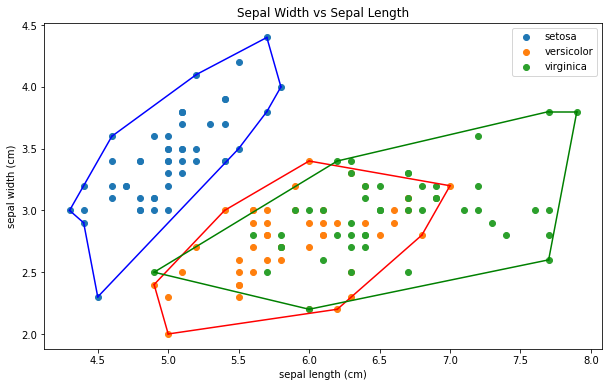

In [200]:
#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Sepal Width vs Sepal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  hull = myConvexHull(bucket) # hasil implementasi ConvexHull Divide & Conquer
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
  for simplex in hull:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

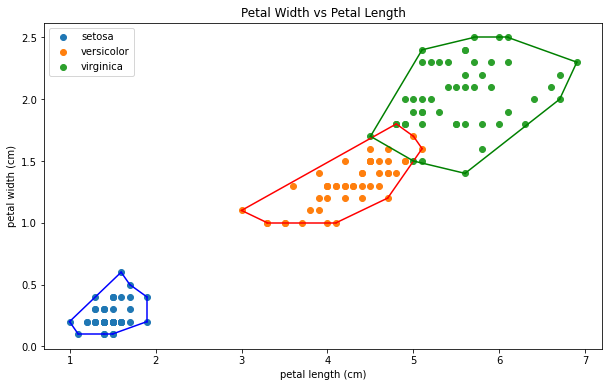

In [201]:
#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[2,3]].values
  hull = myConvexHull(bucket) # hasil implementasi ConvexHull Divide & Conquer
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
  for simplex in hull:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

DATASET WINE

In [202]:
import pandas as pd
from sklearn import datasets
dataWine = datasets.load_wine()
#create a DataFrame
df = pd.DataFrame(dataWine.data, columns=dataWine.feature_names)
df['Target'] = pd.DataFrame(dataWine.target)
print(df.shape)
df.head()

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


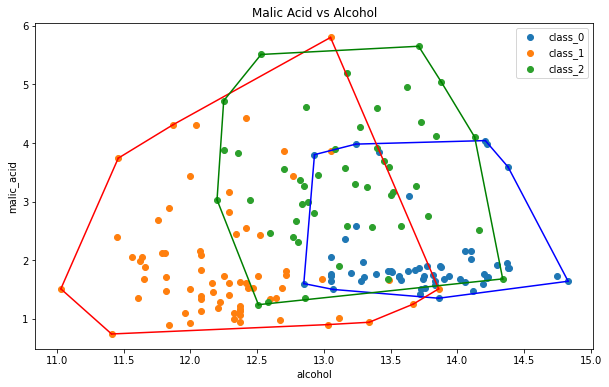

In [203]:
#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Malic Acid vs Alcohol')
plt.xlabel(dataWine.feature_names[0])
plt.ylabel(dataWine.feature_names[1])
for i in range(len(dataWine.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  hull = myConvexHull(bucket) # hasil implementasi ConvexHull Divide & Conquer
  plt.scatter(bucket[:, 0], bucket[:, 1], label=dataWine.target_names[i])
  for simplex in hull:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

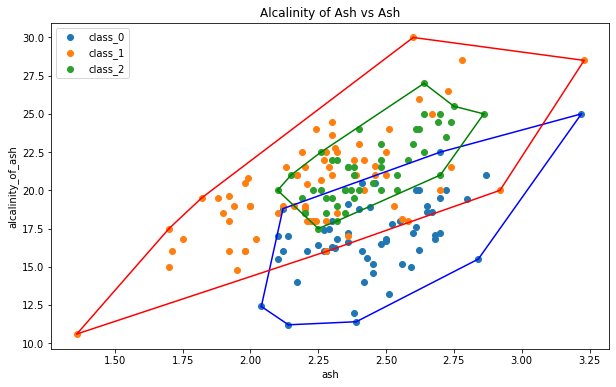

In [205]:
#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Alcalinity of Ash vs Ash')
plt.xlabel(dataWine.feature_names[2])
plt.ylabel(dataWine.feature_names[3])
for i in range(len(dataWine.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[2,3]].values
  hull = myConvexHull(bucket) # hasil implementasi ConvexHull Divide & Conquer
  plt.scatter(bucket[:, 0], bucket[:, 1], label=dataWine.target_names[i])
  for simplex in hull:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

DATASET BREAST CANCER

In [206]:
import pandas as pd
from sklearn import datasets
databc = datasets.load_breast_cancer()
#create a DataFrame
df = pd.DataFrame(databc.data, columns=databc.feature_names)
df['Target'] = pd.DataFrame(databc.target)
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


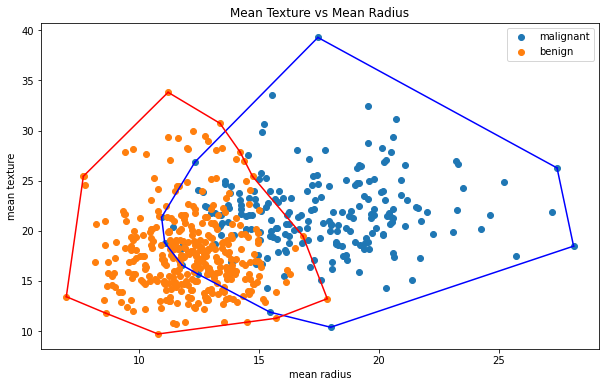

In [208]:
#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Mean Texture vs Mean Radius')
plt.xlabel(databc.feature_names[0])
plt.ylabel(databc.feature_names[1])
for i in range(len(databc.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  hull = myConvexHull(bucket) # hasil implementasi ConvexHull Divide & Conquer
  plt.scatter(bucket[:, 0], bucket[:, 1], label=databc.target_names[i])
  for simplex in hull:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

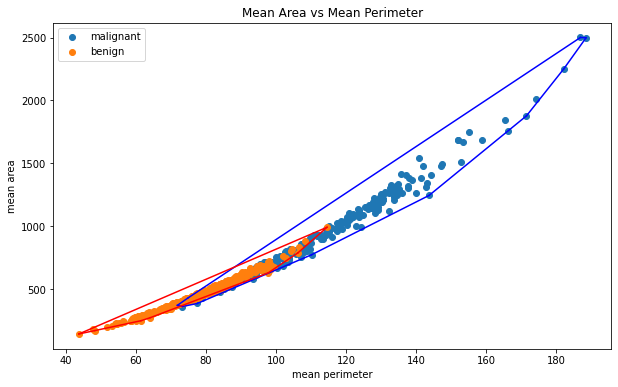

In [209]:
#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Mean Area vs Mean Perimeter')
plt.xlabel(databc.feature_names[2])
plt.ylabel(databc.feature_names[3])
for i in range(len(databc.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[2,3]].values
  hull = myConvexHull(bucket) # hasil implementasi ConvexHull Divide & Conquer
  plt.scatter(bucket[:, 0], bucket[:, 1], label=databc.target_names[i])
  for simplex in hull:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()